In [7]:
import pandas as pd
import seaborn as sb

In [8]:
df = pd.read_csv("diabetes.csv")

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
x=df.drop("Outcome",axis=1)
y = df["Outcome"]

<AxesSubplot:xlabel='Outcome', ylabel='count'>

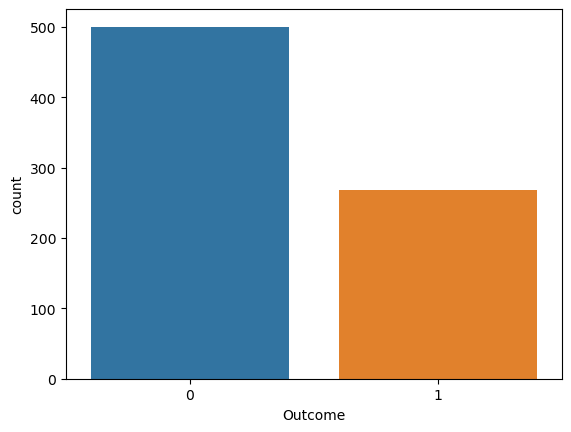

In [11]:
sb.countplot(x = y)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.25)

In [14]:
x.shape

(768, 8)

In [15]:
x_train.shape

(576, 8)

In [16]:
x_test.shape

(192, 8)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [18]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay, classification_report

In [19]:
y_pred = knn.predict(x_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


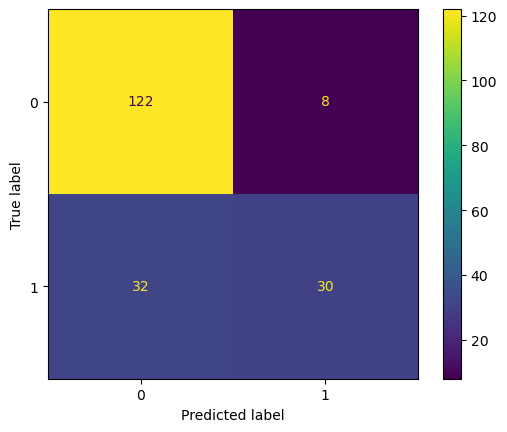

In [24]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192

